# literally a space to work on the writeup while avoiding merge conflicts. put this in the other notebook when done.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Reddit Sentiment Analysis
## Allison Li and Berwin Lan
### Software Design Spring 2021 Midterm Project

## Introduction
In this project, we wanted to investigate the nature of human behavior and self-regulation in anonymous virtual spaces. Reddit is an online forum where replies are nested in threads; that is, a single comment can generate many replies as child comments, and each of those comments can then generate its own respective child comments. We were interested in how sentiments, or emotion, changed throughout a comment thread, and whether sentiment was amplified or damped by increased nesting. This story is important because of the differences seen in online vs. in-person communication, and our results can help us understand what drives the way people behave and interact in online spaces, especially when anonymous. Our project is organized into data processing in `data_cleaning.py`, sentiment analysis in `sentiment_analysis.py`, and data visualization in this notebook. We acquired data, cleaned it, analyzed it, and visualized it. In this computational essay, we offer our conclusions and a look into our process.

## Methodology

We used data from Reddit, which we scraped using [PRAW (Python Reddit API Wrapper)](https://pypi.org/project/praw "Allows for simple access to reddit's API.") to access the [Reddit API](https://www.reddit.com/wiki/api "Reddit API Access."). The data is directly stored in .csv files, which are accessed using [pandas](https://pandas.pydata.org/ "A data analysis tool") DataFrames. Our visualizations, created using [seaborn](https://seaborn.pydata.org/) and [matplotlib](https://matplotlib.org/), use the subreddit in which a thread is located, the depth of each individual comment, and the average sentiment of all the comments at a given depth in a given comment thread.

### Data Processing
Data processing is comprised of three steps: cleaning the data, lemmatizing the data, and tokenizing the data. 
* Data cleaning is the process of removing all unwanted characters, such as links and emojis. All letters are also cast to lowercase text.

* Lemmatizing is the process by which different inflections of a word are collapsed into its base form for analysis. For example, the words `coding`, `codes`, and `coder` would all be considered `code` after being lemmatized. An example is shown below.


In [2]:
from data_cleaning import clean_comment, lemmatize_sentence
example_sentence = 'Its wings are too small to get its fat little body off the ground.'

print(f'Cleaned and lemmatized sentence: {lemmatize_sentence(example_sentence)}\n')

[nltk_data] Downloading package wordnet to /home/softdes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/softdes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cleaned and lemmatized sentence: it wing are too small to get it fat little body off the ground



* Tokenizing the data breaks a block of text into parts; in our case, we tokenized each paragraph of input into sentences. An example is shown below, with `\` as the delimiter.

In [3]:
example_text = 'According to all known laws of aviation, there is no way a bee should be able to fly. \
                Its wings are too small to get its fat little body off the ground. The bee, of course, \
                flies anyway because bees don\'t care what humans think is impossible. \
                Yellow, black. Yellow, black. Yellow, black. Yellow, black. Ooh, black and yellow!'
print(f'Cleaned, lemmatized, and tokenized comment (with sentences separated): {clean_comment(example_text)}')

Cleaned, lemmatized, and tokenized comment (with sentences separated): according to all known law of aviation there is no way a bee should be able to fly\it wing are too small to get it fat little body off the ground\the bee of course fly anyway because bee don t care what human think is impossible\yellow black\yellow black\yellow black\yellow black\ooh black and yellow


### Sentiment Analysis
A general, top-level view of sentiment analysis can be described as follows:
* Find and store all the child replies to a single comment.
* Organize comments in a thread by depth, where the original comment has a depth of `0`, its replies have a depth of `1`, etc.
* Select the comments with the greatest depth to analyze.
* Find the average sentiment of all comments at one depth, and create a dictionary of each depth's average sentiment.

Please refer to `sentiment_analysis.py` for greater detail.

## Results

    What summaries or visualizations did you create?
    What are the interesting and/or important parts of these summaries or visualizations?
    How do these results answer your questions or tell your story?

In [4]:
from sentiment_analysis import analyze_subreddit
import matplotlib.pyplot as plt
import seaborn as sns
import plotting_functions

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/softdes/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


By plotting a line plot of depth vs. average compound sentiment score, we see that there is a wider range of sentiment from the first comment (depth = 0) compared to the next several layers. The plots of r/AmItheAsshole, which has the greatest sample size out of the subreddits we analyzed, are shown below. Comment depths 0 to 3 appear to converge to a sentiment score of 0, which suggests that at least initially, the sentiment of the first few depths of replies to the initial comment decreases in strength. The bubble plot, also shown below, suggests a correlation between the number of comments and the average sentiment at that depth; with the exception of a few outliers, larger bubbles representing depths with a greater number of comments have an average compound sentiment score closer to 0. By examining the outlier cases, we can preliminarily conclude that consensus between different commenters begins to form after a few replies, and that 1-3 comments for discussion are necessary for consensus.

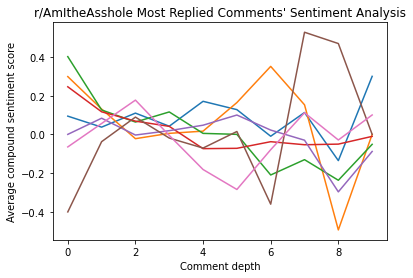

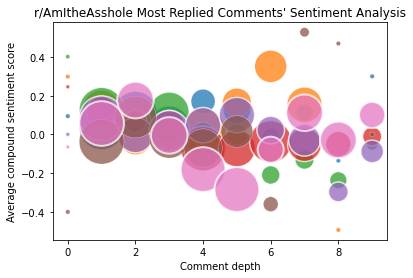

In [5]:
subreddit = "AmItheAsshole"
sentiment_dicts = analyze_subreddit(subreddit)
plotting_functions.sentiment_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_bubble(subreddit, sentiment_dicts)

Looking at the corresponding plots for other subreddits, the trend of depths with the most comments having an average compound sentiment score of +/-0.2 can be observed. This could be due to a myriad of causes, including an equal number of positive and negative sentiments, a general damping of sentiment strength, or a case of VADER analysis being unable to extract a sentiment score from more comments.

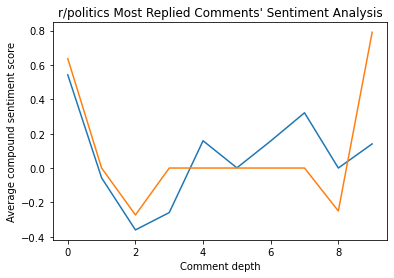

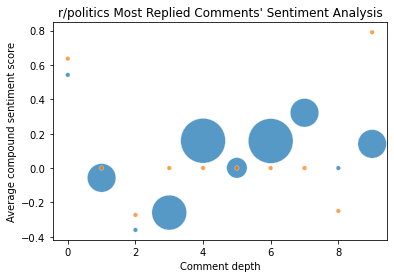

In [6]:
subreddit = 'politics'
sentiment_dicts = analyze_subreddit(subreddit)
plotting_functions.sentiment_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_bubble(subreddit, sentiment_dicts)

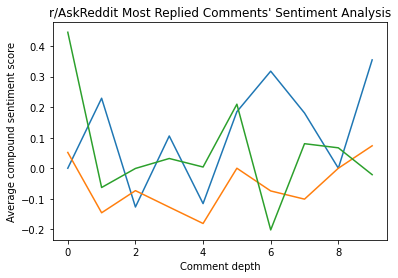

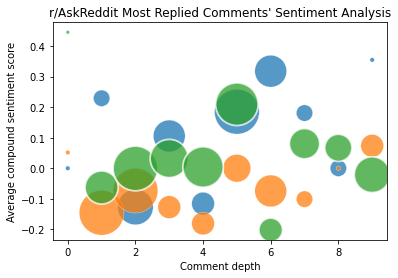

In [7]:
subreddit = 'AskReddit'
sentiment_dicts = analyze_subreddit(subreddit)
plotting_functions.sentiment_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_bubble(subreddit, sentiment_dicts)

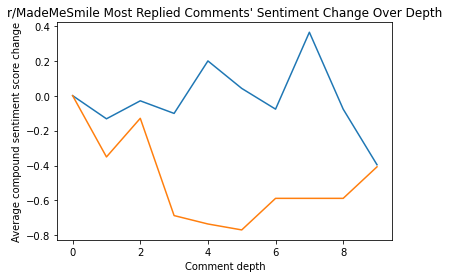

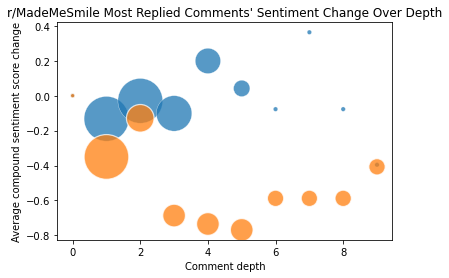

In [8]:
subreddit = 'MadeMeSmile'
sentiment_dicts = analyze_subreddit(subreddit)
plotting_functions.sentiment_difference_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_difference_bubble(subreddit, sentiment_dicts)

Generally, replies whose parent comment has negative sentiment tends to increase in positivity, while replies whose parent comment has positive sentiment tends to increase in negativity.

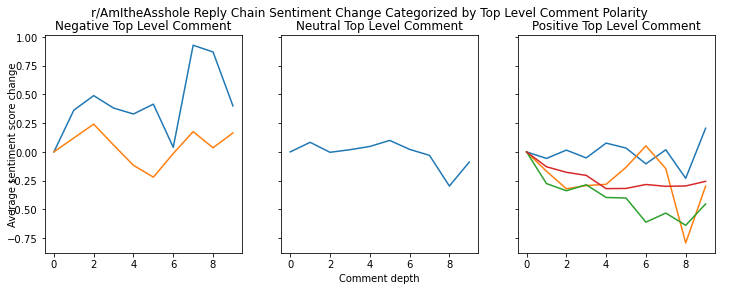

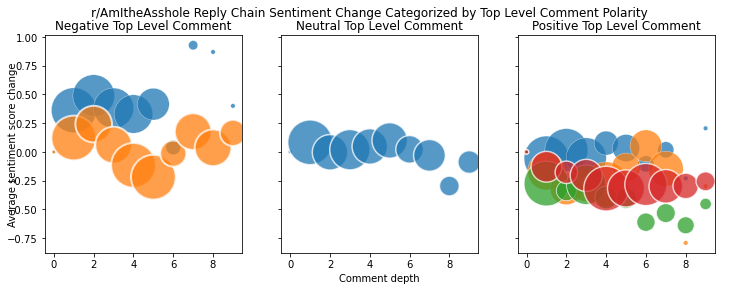

In [9]:
subreddit = 'AmItheAsshole'
sentiment_dicts = analyze_subreddit(subreddit)
plotting_functions.sentiment_categorized_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_categorized_bubble(subreddit, sentiment_dicts)

The side-by-side plots separate the threads into categories based on the sentiment of the initial comment. The plots below show some blank plots because there weren't parent comments that had sentiments in all the categories. The same trends are observed in the subsequent graphs with other subreddits, so we can tentatively conclude that comment threads' sentiments trend toward zero, with strongly sentimented parent comments being damped with a greater number of replies.

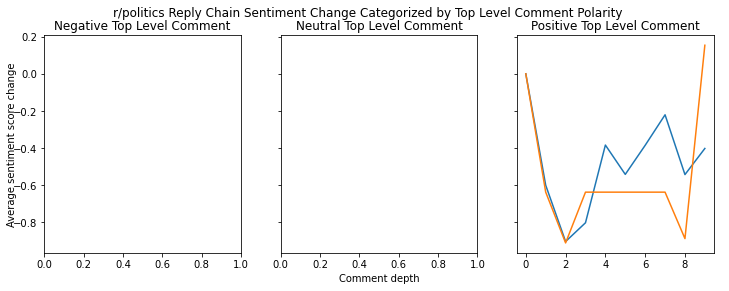

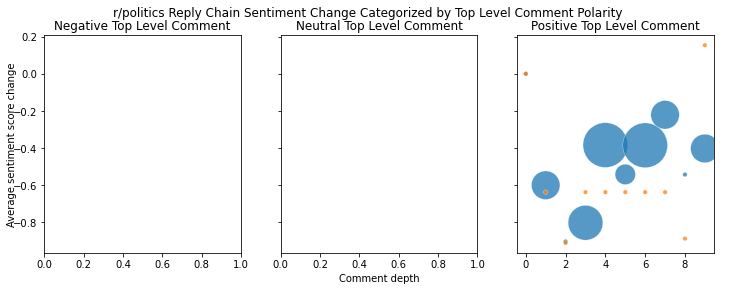

In [10]:
subreddit = 'politics'
sentiment_dicts = analyze_subreddit(subreddit)
plotting_functions.sentiment_categorized_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_categorized_bubble(subreddit, sentiment_dicts)

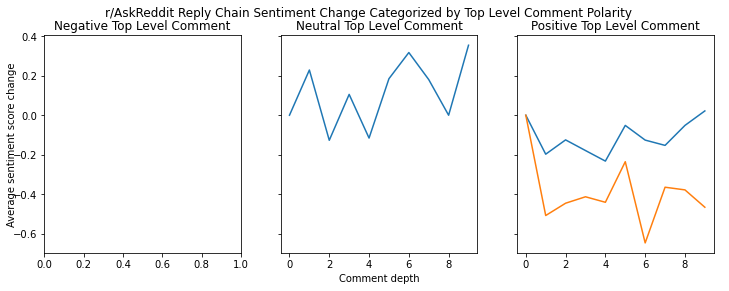

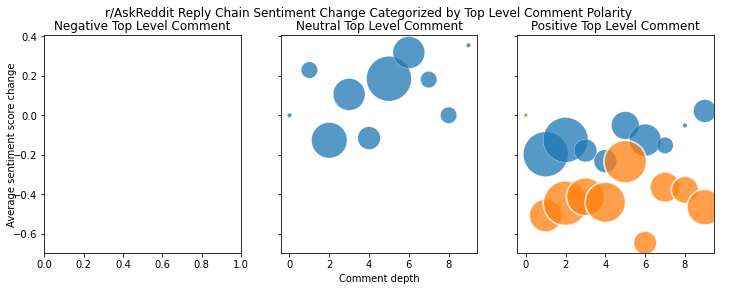

In [11]:
subreddit = 'AskReddit'
sentiment_dicts = analyze_subreddit(subreddit)
plotting_functions.sentiment_categorized_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_categorized_bubble(subreddit, sentiment_dicts)

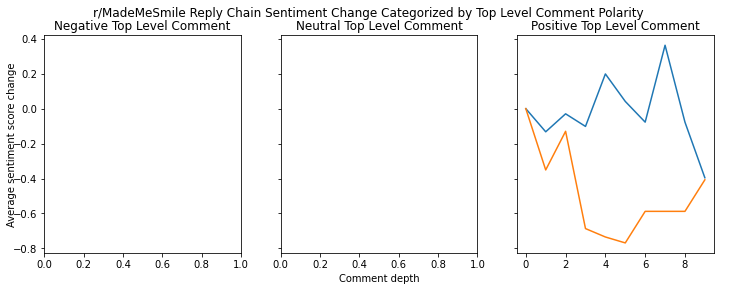

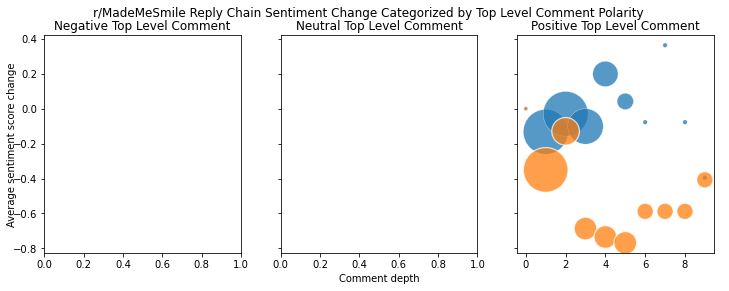

In [12]:
subreddit = 'MadeMeSmile'
sentiment_dicts = analyze_subreddit(subreddit)
plotting_functions.sentiment_categorized_line(subreddit, sentiment_dicts)
plotting_functions.sentiment_categorized_bubble(subreddit, sentiment_dicts)

## Conclusion

Overall, we conclude that there is no correlation between the sentiment of a reply and its parent comment. As seen in the plots, it appears that the number of comments whose sentiments become more positive is more or less equal to those whose sentiments become more negative, as well as a number of threads whose change in sentiment is close to zero.

What are the important insights that the reader should get from this project?
* Our project is a very limited, preliminary examination of how the nature of online interaction shapes the emotional content of messages. While we set out to investigate human behavior and how it is impacted by online spaces and anonymity, our small sample size means that any conclusions that can be drawn or trends that can be identified should be regarded with a significant degree of skepticism. Based on the plots we created, they suggest that comments' sentiment strength decreases compared to the preceding parent comment.
What are the contextual or ethical implications of your topic or work?
* The ethical implications of understanding communication in online forums include the implementation of moderation, "real-world" legal consequences to online actions, and the regulation and ideals of free speech. Contextually, our findings suggest that at least on Reddit, sentiment is likely not the primary factor driving users to reply to a comment.
What lessons did you learn as you did the project?
* In plotting, we learned that there was a non-negligible amount of data processing that had to occur to get meaningful plots. It was also disappointing to accept that no correlation was a valid conclusion, and that overall, our project did not yield any fundamental understanding about the nature of online interactions between anonymous users.
What were the most difficult, challenging, or frustrating parts of the project?
* Cleaning the data in preparation for sentiment analysis was challenging, as there were some inconsistencies in the documentation and resources we were using: for example, we needed to refactor our code to analyze entire sentences rather than individual words. Referring directly to the VADER documentation would have saved us time here. Writing unit tests was also difficult, due to the size and complexity of both the data and VADER/NLTK. 
In what ways would you extend or change your project if you had more time?
* The next steps of this project would be to gather more data points, both in terms of the length of comment threads and the number of unique contributors at each depth. With a larger sample size, our data can be more reliable and the conlusions more concrete. It would also be helpful to extend 